#  Davies-Bouldin Index ve Özellik Ölçekleme (Scaling)

## 1. Davies-Bouldin Index (DBI)

Davies-Bouldin Index (DBI), kümeleme algoritmalarının performansını değerlendirmek için kullanılan içsel bir metriktir. Kümelerin birbirinden ne kadar ayrıştığını ve iç yapılarının ne kadar sıkı olduğunu ölçer.

###  Formül

\[
DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
\]

- \( \sigma_i \): \( i \). kümedeki örneklerin merkezden ortalama uzaklığı
- \( d(c_i, c_j) \): \( i \) ve \( j \) kümelerinin merkezleri arasındaki mesafe

###  Yorum

- Düşük DBI değeri iyi bir kümeleme gösterir.
- Yüksek DBI değeri kümeler arası ayrımın kötü olduğunu gösterir.

## 2. Özellik Ölçekleme (Feature Scaling)

Makine öğrenmesi algoritmalarında, özellikle mesafe temelli algoritmalarda, tüm özelliklerin benzer ölçeklerde olması önemlidir.

###  Yöntemler

#### a. Min-Max Scaling

Verileri 0-1 arasına dönüştürür.

\[
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
\]

#### b. Standardization (Z-score)

Verilerin ortalamasını 0, standart sapmasını 1 yapar.

\[
x' = \frac{x - \mu}{\sigma}
\]

#### c. Robust Scaling

Medyan ve IQR kullanır, aykırı değerlere dayanıklıdır.



Davies-Bouldin Index: 0.1737


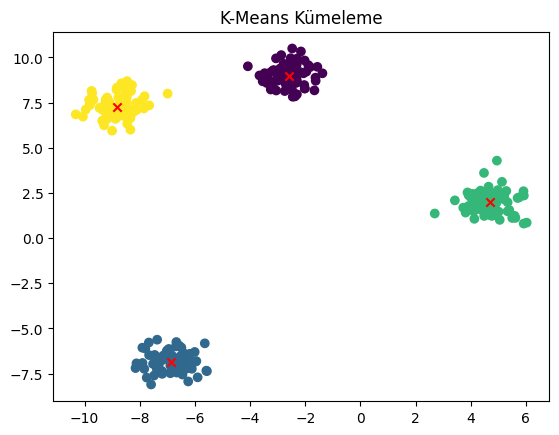

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)


kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

dbi = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {dbi:.4f}")

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x')
plt.title("K-Means Kümeleme")
plt.show()


In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)

standard = StandardScaler()
X_standard = standard.fit_transform(X)

robust = RobustScaler()
X_robust = robust.fit_transform(X)

print("MinMax:\n", X_minmax[:5])
print("Standard:\n", X_standard[:5])
print("Robust:\n", X_robust[:5])


MinMax:
 [[0.07384532 0.80218118]
 [0.05912779 0.81719382]
 [0.5079908  0.8811322 ]
 [0.20251259 0.10124852]
 [0.015909   0.79707547]]
Standard:
 [[-1.09518511  0.64043749]
 [-1.14131498  0.68554929]
 [ 0.26557797  0.87767903]
 [-0.6918971  -1.46580952]
 [-1.27677771  0.62509524]]
Robust:
 [[-0.57172337  0.18945596]
 [-0.60378795  0.22056785]
 [ 0.3741343   0.35307241]
 [-0.29140046 -1.26314232]
 [-0.69794722  0.178875  ]]
